In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("/Clean15YearChennaiWeather.csv")
df.head()

,date,date_id,wind,desc,temp,baro,hum,day,month,day_date,year,day_name,Start_hour,End_hour
0,"Sunday 14 July 2024, 18.00 — 00.00",1.720980e+12,9.0,Drizzle. Fog.,30.0,1003.0,82,2024-07-14,7,14,2024,6,18:00,00:00
1,"Monday 15 July 2024, 00.00 — 06.00",1.721002e+12,14.0,Fog.,29.0,1002.0,80,2024-07-15,7,15,2024,0,00:00,06:00
2,"Monday 15 July 2024, 06.00 — 12.00",1.721023e+12,17.0,Drizzle. Broken clouds.,29.0,1003.0,82,2024-07-15,7,15,2024,0,06:00,12:00
3,"Monday 15 July 2024, 12.00 — 18.00",1.721045e+12,13.0,Drizzle. Broken clouds.,29.0,1001.0,85,2024-07-15,7,15,2024,0,12:00,18:00
4,"Monday 15 July 2024, 18.00 — 00.00",1.721066e+12,19.0,Fog.,29.0,1002.0,84,2024-07-15,7,15,2024,0,18:00,00:00


# Data Quality Checks

In [5]:
df.describe()

,date_id,wind,temp,baro,hum,month,day_date,year,day_name
count,1.068000e+03,1068.000000,1038.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,1.470229e+12,11.558052,30.314066,978.586142,72.743446,7.846442,18.913858,2015.970037,2.951311
std,2.307234e+11,6.947885,3.542770,166.914996,17.154781,3.089847,7.536483,7.375270,2.042076
min,1.252454e+12,0.000000,21.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,1.258216e+12,5.000000,28.000000,1003.000000,66.000000,7.000000,15.000000,2009.000000,1.000000
50%,1.263978e+12,13.000000,30.000000,1006.000000,74.000000,7.000000,20.000000,2010.000000,3.000000
75%,1.721563e+12,18.000000,34.000000,1012.000000,84.000000,10.000000,25.000000,2024.000000,5.000000
max,1.722276e+12,22.000000,38.000000,1019.000000,100.000000,12.000000,31.000000,2024.000000,6.000000


In [6]:
df.shape

(1068, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1068 non-null   object 
 1   date_id     1068 non-null   float64
 2   wind        1068 non-null   float64
 3   desc        1068 non-null   object 
 4   temp        1038 non-null   float64
 5   baro        1068 non-null   float64
 6   hum         1068 non-null   int64  
 7   day         1068 non-null   object 
 8   month       1068 non-null   int64  
 9   day_date    1068 non-null   int64  
 10  year        1068 non-null   int64  
 11  day_name    1068 non-null   int64  
 12  Start_hour  1068 non-null   object 
 13  End_hour    1068 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 116.9+ KB


In [8]:
df.nunique()

,0
date,641
date_id,641
wind,23
desc,29
temp,18
baro,25
hum,62
day,161
month,6
day_date,31


In [10]:
df.isnull().sum()

,0
date,0
date_id,0
wind,0
desc,0
temp,0
baro,0
hum,0
day,0
month,0
day_date,0


In [9]:
df = df.dropna(subset=['temp'])

### outlier count

temp outliers count: 0


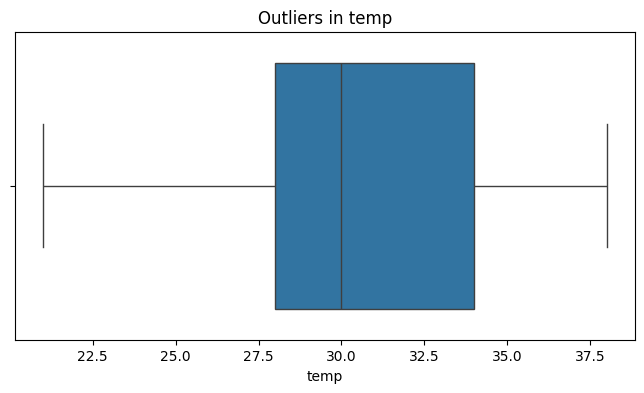

hum outliers count: 1


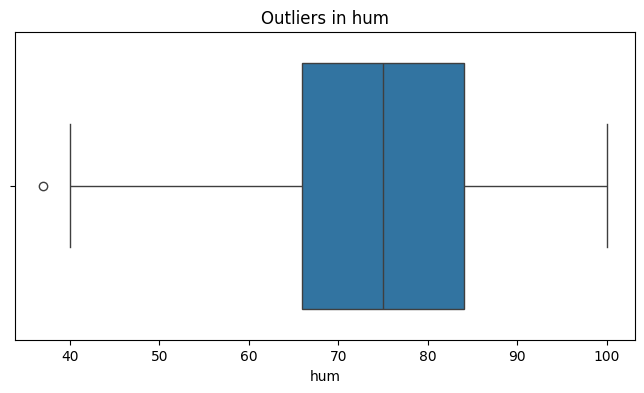

baro outliers count: 3


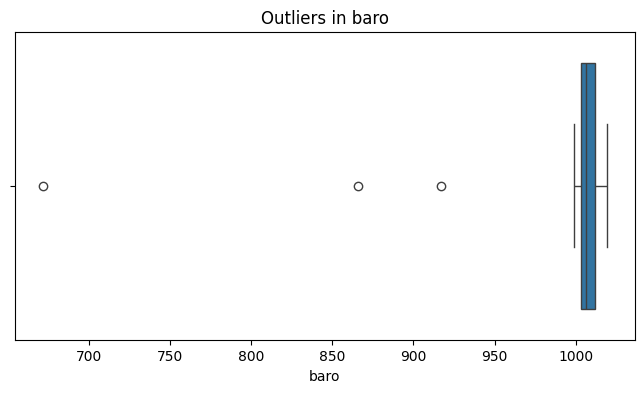

In [12]:
for col in ["temp", "hum", "baro"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} outliers count: {len(outliers)}")
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

### Temperature Distribution

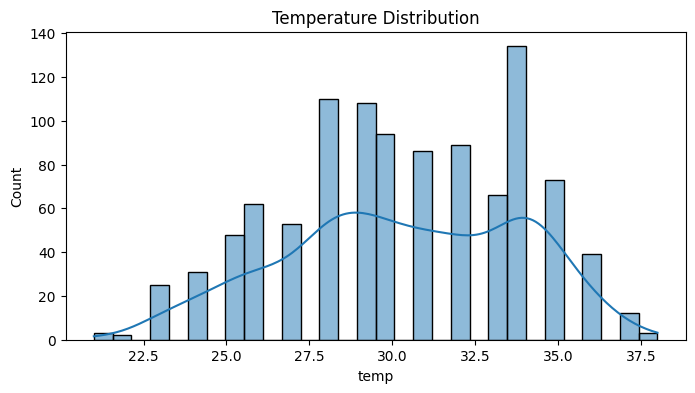

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['temp'], bins=30, kde=True)
plt.title("Temperature Distribution")
plt.show()

### Humidity Distribution

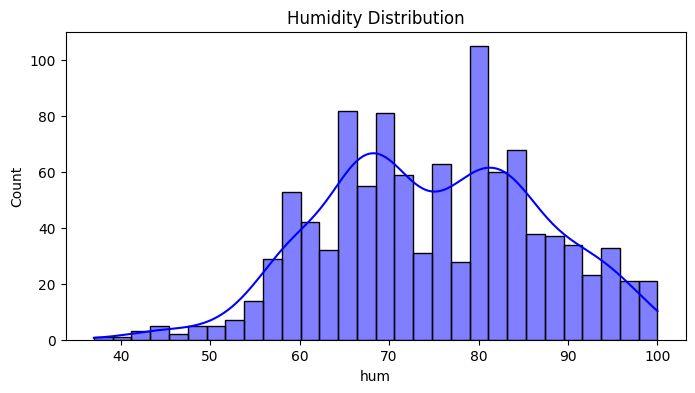

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['hum'], bins=30, kde=True, color="blue")
plt.title("Humidity Distribution")
plt.show()

### Wind Speed Histogram

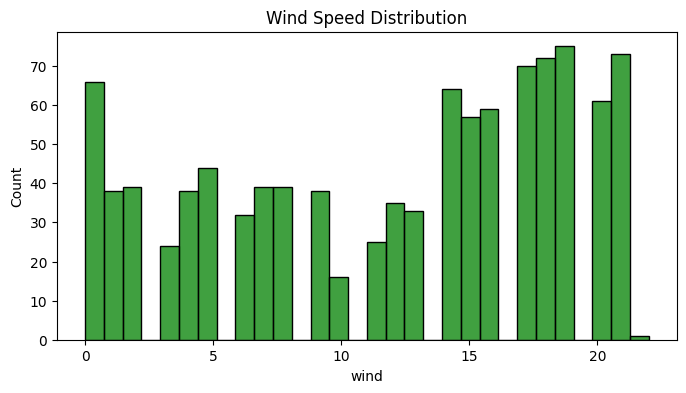

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['wind'], bins=30, color="green")
plt.title("Wind Speed Distribution")
plt.show()

### Pressure Boxplot

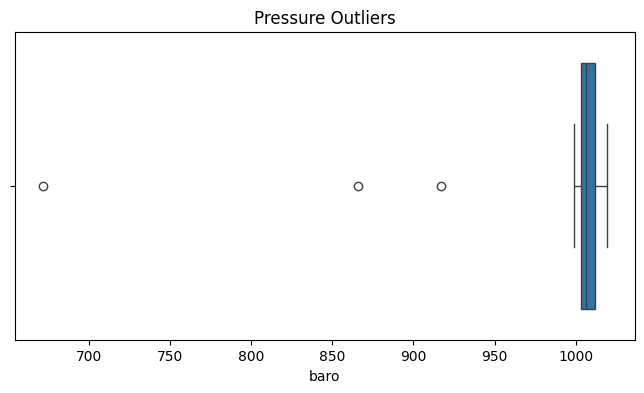

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['baro'])
plt.title("Pressure Outliers")
plt.show()

## Time-Series Trends

In [17]:
df['date'] = pd.to_datetime(df['day'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

### Yearly Avg Temperature

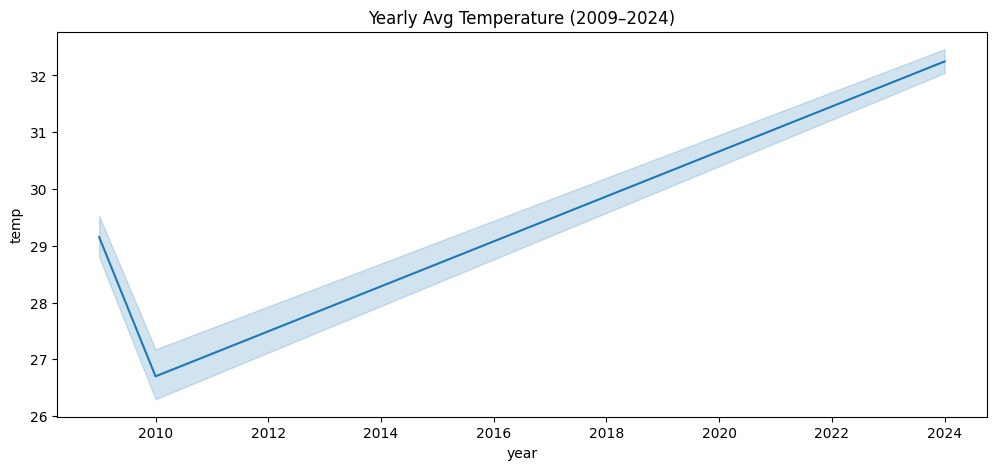

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="year", y="temp")
plt.title("Yearly Avg Temperature (2009–2024)")
plt.show()

## Temp vs Humidity

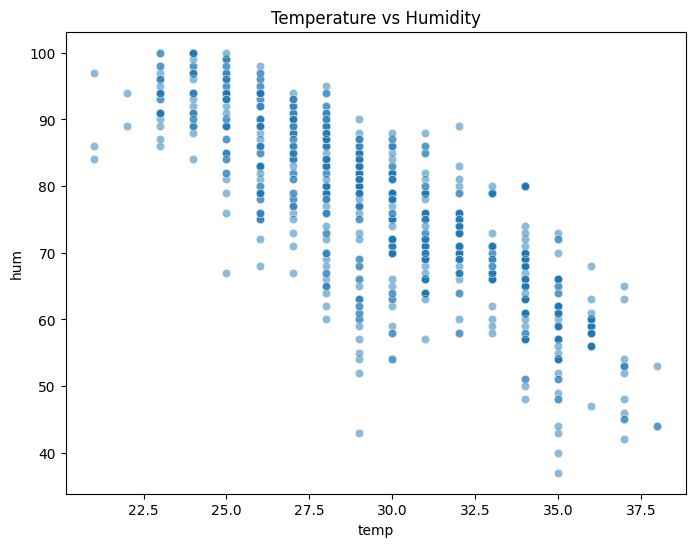

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="temp", y="hum", data=df, alpha=0.5)
plt.title("Temperature vs Humidity")
plt.show()

## Correlation Heatmap

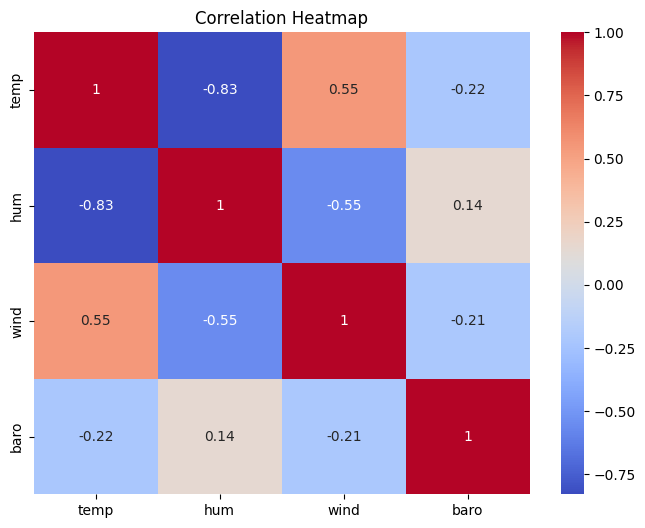

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','hum','wind','baro']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
print("Top 10 Hottest Days:\n", df.nlargest(10, 'temp')[['date','temp']])
print("Top 10 Coldest Days:\n", df.nsmallest(10, 'temp')[['date','temp']])
print("Most Humid Days:\n", df.nlargest(10, 'hum')[['date','hum']])
print("Strongest Wind Days:\n", df.nlargest(10, 'wind')[['date','wind']])

Top 10 Hottest Days:
           date  temp
522 2009-09-17  38.0
554 2009-09-25  38.0
602 2009-10-07  38.0
490 2009-09-09  37.0
494 2009-09-10  37.0
510 2009-09-14  37.0
514 2009-09-15  37.0
525 2009-09-18  37.0
526 2009-09-18  37.0
530 2009-09-19  37.0
Top 10 Coldest Days:
            date  temp
960  2010-01-05  21.0
1028 2010-01-22  21.0
1032 2010-01-23  21.0
956  2010-01-04  22.0
964  2010-01-06  22.0
744  2009-11-12  23.0
836  2009-12-05  23.0
840  2009-12-06  23.0
844  2009-12-07  23.0
848  2009-12-08  23.0
Most Humid Days:
           date  hum
716 2009-11-05  100
732 2009-11-09  100
744 2009-11-12  100
828 2009-12-03  100
836 2009-12-05  100
868 2009-12-13  100
879 2009-12-15  100
880 2009-12-16  100
904 2009-12-22  100
984 2010-01-11  100
Strongest Wind Days:
           date  wind
705 2009-11-02  22.0
5   2024-07-16  21.0
6   2024-07-16  21.0
11  2024-07-17  21.0
19  2024-07-19  21.0
35  2024-07-23  21.0
47  2024-07-26  21.0
50  2024-07-27  21.0
54  2024-07-28  21.0
55  2024-07-2

In [23]:
def season(month):
    if month in [3,4,5,6]:
        return "Summer"
    elif month in [7,8,9,10,11]:
        return "Monsoon"
    else:
        return "Winter"

df['season'] = df['month'].apply(season)

season_avg = df.groupby('season')[['temp','hum','wind','baro']].mean()
print(season_avg)

monsoon_weather = df[df['season']=="Monsoon"]['desc'].value_counts().head(10)
print(monsoon_weather)


              temp        hum       wind         baro
season                                               
Monsoon  31.503797  72.393671  12.948101  1004.637975
Winter   26.524194  82.657258   8.528226  1013.975806
desc
Broken clouds.             196
Passing clouds.            145
Partly cloudy.             128
Fog.                       122
Scattered clouds.           99
Drizzle. Fog.               24
Drizzle. Broken clouds.     19
Haze.                       19
Partly sunny.                9
Clear.                       6
Name: count, dtype: int64


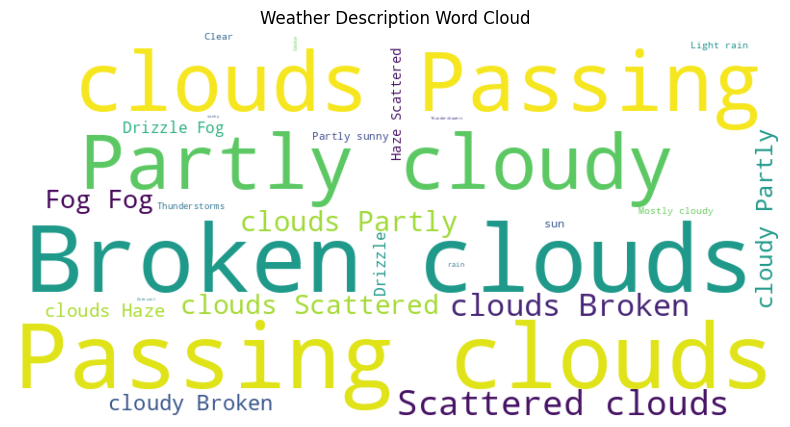

In [27]:
text = " ".join(desc for desc in df['desc'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Weather Description Word Cloud")
plt.show()